## Đánh giá:
1.   Part 1:  Dùng custom dataset Brain tumor thực nghiệm trên Yolov4
2.   Part 2:  Dùng custom dataset Brain tumor thực nghiệm trên Faster-RNN

Link nguồn của dataset:
https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets



##Part 1: Thực nghiệm bộ dataset với model Yolov4

In [ ]:
!nvidia-smi

Thu Dec 15 06:50:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENMP=0/OPENMP=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/ima

In [ ]:
Path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images'

###Prepare data

In [ ]:
#To collect names of all images in training set
import glob
x = '.jpg'
imglist = glob.glob(Path+ "/test/*{}".format(x),recursive=False)
print(len(imglist))
with open(Path+ "/test.txt",'w',encoding='utf-8') as f:
  for img in imglist:
    img=img.replace("\\","/")
    f.write(img+'\n')

75


In [ ]:
imglist = glob.glob(Path+ "/train/*{}".format(x),recursive=False)
print(len(imglist))
with open(Path+ "/train.txt",'w',encoding='utf-8') as f:
  for img in imglist:
    img=img.replace("\\","/")
    f.write(img+'\n')

296


###Samples data
Custom brain tumor dataset with 2 classes: negative and positive

In [83]:
!pip install pybboxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
#Install libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pybboxes as pbx

In [ ]:
category_index = {
    0: {'id': 0, 'name': 'negative'},
    1: {'id': 1, 'name': 'positive'}
}

In [ ]:
def sample_data(img_path,img_annotation_path, category_index):
  img = cv2.imread(img_path)
  dh, dw, _ = img.shape

  with open(img_annotation_path) as f:
    anno=f.read()

  classes, x, y, w, h=map(float, anno.split(' '))
  img_annotation = img.copy()
  box=pbx.convert_bbox((x,y,w,h), from_type="yolo", to_type="voc", image_size=(dw, dh))

  # draw the rectangle
  cv2.rectangle(img_annotation, (box[0],box[1]), (box[2],box[3]), (0,0,255), thickness= 3, lineType=cv2.LINE_8) 
  # display the output
  label=str(category_index[int(classes)])
  plt.title(label)
  plt.imshow(img_annotation) 

In [ ]:
!pip install pybboxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Negative sample

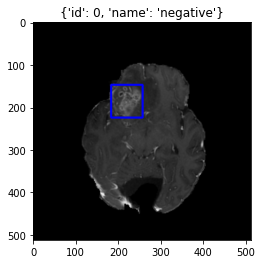

In [ ]:
img_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train/00095_170.jpg'
annotation_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train/00095_170.txt'

sample_data(img_path,annotation_path,category_index)

Positive sample

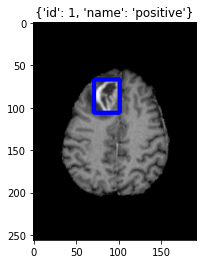

In [ ]:
img_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train/00350_139.jpg'
annotation_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train/00350_139.txt'

sample_data(img_path,annotation_path,category_index)

###Training model yolov4 with custom dataset

In [ ]:
#Training
!./darknet detector train /content/drive/MyDrive/colab/pytorch-YOLOv4/data/Obj.data /content/drive/MyDrive/colab/pytorch-YOLOv4/cfg/yolov4-custom.cfg /content/drive/MyDrive/colab/weights/yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.567015), count: 7, class_loss = 2.915315, iou_loss = 8.781166, total_loss = 11.696481 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.594439), count: 14, class_loss = 4.800273, iou_loss = 4.600732, total_loss = 9.401005 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.378676), count: 5, class_loss = 1.580754, iou_loss = 0.213001, total_loss = 1.793755 
 total_bbox = 191202, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.435494), count: 4, class_loss = 1.273062, iou_loss = 2.169105, total_loss = 3.442168 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.562153), count: 16, class_loss = 4.181244, iou_loss = 4.850351, total_loss = 9.031595 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, c

###Testing mAP

In [ ]:
#Thực hiện kiểm tra mAP của model vừa training
!./darknet detector map /content/drive/MyDrive/colab/pytorch-YOLOv4/data/Obj.data /content/drive/MyDrive/colab/pytorch-YOLOv4/cfg/yolov4-custom.cfg /content/drive/MyDrive/colab/pytorch-YOLOv4/outputs/yolov4-custom_last.weights

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

###Testing

A sample of tesing

In [ ]:
#Image 00018_101.jpg with annotation
#0 0.610915 0.661385 0.167840 0.134977
#0 0.599765 0.538732 0.091549 0.063380
!./darknet detector test /content/drive/MyDrive/colab/pytorch-YOLOv4/data/Obj.data /content/drive/MyDrive/colab/pytorch-YOLOv4/cfg/yolov4-custom.cfg /content/drive/MyDrive/colab/pytorch-YOLOv4/outputs/yolov4-custom_last.weights /content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/test/00018_101.jpg -thresh 0.3

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

##Part 2: Thực nghiệm trên bộ dataset với model Faster-RNN

###Prepare data

In [ ]:
!pip install -U albumentations

In [3]:
import torch
import os
import time
import shutil
import torch.nn as nn
from skimage import io
import pandas as pd
import torchvision
import cv2
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler


In [4]:
import albumentations 
from albumentations.pytorch import ToTensorV2
from torchvision import utils
from albumentations import (HorizontalFlip, ShiftScaleRotate, VerticalFlip, Normalize,Flip, Compose, GaussNoise)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Data loader

In [72]:
import csv
def merge_image_annotation(img_ids,img_dir,annotation_path):
  with open(annotation_path,'w') as fw:
    fw.write('image_id,width,height,x,y,w,h\n')
    with open(img_ids,'r') as fr:
      img_path = fr.readline().strip() 
      while img_path : 
      # read image path 
        img = cv2.imread(img_path)
        print(img_path)
        height, width, _ = img.shape
        anno_str = str(img_path) +','

        # split image id
        img_id = img_path.split('/')[-1]
        img_id = img_id.split('.')[0]
        img_annotation_path= img_dir+'/'+img_id +'.txt'
      
        #read bbox
        with open(img_annotation_path) as ar:
          anno= ar.read()
        lines=anno.split('\n')
        for line in lines:
          classes, x, y, w, h=map(float, line.split(' '))
          bbox=[width,height,x,y,w,h]
      
          bbox_str=','.join(map(str,bbox))
          data_str=anno_str+bbox_str + '\n'
          fw.write(data_str)
        img_path = fr.readline().strip() 

      


In [ ]:
#Train set
annotation_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train.csv'
img_ids='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train.txt'
img_dir='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train'

merge_image_annotation(img_ids,img_dir,annotation_path)

In [ ]:
#Test set
annotation_path='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/test.csv'
img_ids='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/test.txt'
img_dir='/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/test'

merge_image_annotation(img_ids,img_dir,annotation_path)

In [1]:
def process_df(df):
  df['x'] = df['x'].astype(np.float32)
  df['y'] = df['y'].astype(np.float32)
  df['w'] = df['w'].astype(np.float32)
  df['h'] = df['h'].astype(np.float32)
  return df

In [6]:
train = pd.read_csv('/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/train.csv')
train_df = process_df(train)
train_df.head()

,image_id,width,height,x,y,w,h
0,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,512,512,0.428991,0.361502,0.144366,0.150235
1,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,512,512,0.424883,0.376761,0.215962,0.248826
2,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,512,512,0.443075,0.373826,0.142019,0.193662
3,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,512,512,0.426643,0.383216,0.250000,0.259390
4,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,512,512,0.437793,0.387324,0.237089,0.241784


In [7]:
test= pd.read_csv('/content/drive/MyDrive/colab/pytorch-YOLOv4/data/images/test.csv')
test_df = process_df(test)
test_df.head()

,image_id,width,height,x,y,w,h
0,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,256,256,0.434859,0.644953,0.095070,0.123239
1,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,256,256,0.438967,0.639085,0.105634,0.125587
2,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,256,256,0.358568,0.701878,0.059859,0.051643
3,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,256,256,0.433099,0.641432,0.091549,0.111502
4,/content/drive/MyDrive/colab/pytorch-YOLOv4/da...,256,256,0.430164,0.638498,0.113850,0.138498


In [8]:
def get_transforms(phase):
            list_transforms = []
            if phase == 'train':
                list_transforms.extend([
                       Flip(p=0.5)
                         ])
            list_transforms.extend(
                    [
            ToTensorV2(),
                    ])
            list_trfms = Compose(list_transforms,
                                 bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
            return list_trfms

In [21]:
class BRT(Dataset):
    def __init__(self,data_frame,phase='train'):
        super().__init__()
        self.df = data_frame
        #self.image_dir = image_dir
        self.images = data_frame['image_id'].unique()
        self.transforms = get_transforms(phase)
        
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image = self.images[idx]
#         image_arr = io.imread(os.path.join(self.image_dir,image))
        
        image_arr = cv2.imread(image, cv2.IMREAD_COLOR)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB).astype(np.float32)
        image_arr /= 255.0
        #image_id = str(image.split('.')[0])
        point = self.df[self.df['image_id'] == image]
        boxes = point[['x', 'y', 'w', 'h']].values
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
        
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)
        
        # there is only one class
        labels = torch.ones((point.shape[0],), dtype=torch.int64)
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((point.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor(idx)
        target['area'] = area
        target['iscrowd'] = iscrowd
        
        if self.transforms:
            sample = {
                'image': image_arr,
                'bboxes': target['boxes'],
                'labels': target['labels']
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
        target['boxes'] = torch.stack(tuple(map(torch.tensor, 
                                                zip(*sample['bboxes'])))).permute(1, 0)
        
        return image, target, image
            

Train set and test set

In [22]:
train_data= BRT(train_df,'train')
valid_data= BRT(test_df,'test')

In [23]:
def collate_fn(batch):
    return tuple(zip(*batch))

train_data_loader = DataLoader(
    train_data,
    batch_size=8,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_data,
    batch_size=8,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


###Load Faster-RNN

In [12]:
#Load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
num_classes = 2  # 1 class (wheat) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [24]:
images, targets, ids = next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

In [15]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.001)


###Training Faster-RNN

In [16]:
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, checkpoint_path)
    # if it is a best model, min validation loss
    if is_best:
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(checkpoint_path, best_model_path)
        
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

In [ ]:
num_epochs = 100
train_loss_min = 0.9
total_train_loss = []


checkpoint_path = '/content/drive/MyDrive/colab/Faster-RNN/chkpoint_'
best_model_path = '/content/drive/MyDrive/colab/Faster-RNN/bestmodel_may12.pt'

for epoch in range(num_epochs):
    print(f'Epoch :{epoch + 1}')
    start_time = time.time()
    train_loss = []
    model.train()
    for images, targets, image_ids in train_data_loader:
        
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        train_loss.append(losses.item())        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    #train_loss/len(train_data_loader.dataset)
    epoch_train_loss = np.mean(train_loss)
    total_train_loss.append(epoch_train_loss)
    print(f'Epoch train loss is {epoch_train_loss}')
    
#     if lr_scheduler is not None:
#         lr_scheduler.step()
    
    # create checkpoint variable and add important data
    checkpoint = {
            'epoch': epoch + 1,
            'train_loss_min': epoch_train_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }
    
    # save checkpoint
    save_ckp(checkpoint, False, checkpoint_path, best_model_path)
    ## TODO: save the model if validation loss has decreased
    if epoch_train_loss <= train_loss_min:
            print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min,epoch_train_loss))
            # save checkpoint as best model
            save_ckp(checkpoint, True, checkpoint_path, best_model_path)
            train_loss_min = epoch_train_loss
    
    time_elapsed = time.time() - start_time
    print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Epoch :1


Evaluation with Faster RNN

In [33]:
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]  
model.eval()
prediction= model(x)

In [34]:
print(prediction)

[{'boxes': tensor([[1.7883e+02, 6.3550e+01, 1.8362e+02, 6.9090e+01],
        [1.8193e+02, 6.4183e+01, 1.8678e+02, 6.9580e+01],
        [1.8352e+02, 6.5067e+01, 1.8808e+02, 7.0338e+01],
        [1.8047e+02, 6.2705e+01, 1.8502e+02, 6.8044e+01],
        [1.8053e+02, 6.5561e+01, 1.8505e+02, 7.0674e+01],
        [3.1076e+02, 5.8656e+01, 3.1593e+02, 6.6489e+01],
        [1.3338e+02, 6.0619e+01, 1.3712e+02, 6.4201e+01],
        [2.3064e+02, 5.9369e+01, 2.3425e+02, 6.3367e+01],
        [2.3393e+02, 6.0245e+01, 2.3738e+02, 6.3924e+01],
        [3.1284e+02, 5.8862e+01, 3.1754e+02, 6.6038e+01],
        [3.0965e+02, 6.0756e+01, 3.1487e+02, 6.7858e+01],
        [2.3495e+02, 5.8507e+01, 2.3859e+02, 6.2662e+01],
        [2.3048e+02, 6.2168e+01, 2.3417e+02, 6.5924e+01],
        [2.2893e+02, 6.3346e+01, 2.3252e+02, 6.7268e+01],
        [2.3239e+02, 6.0454e+01, 2.3599e+02, 6.4148e+01],
        [2.3036e+02, 6.0673e+01, 2.3413e+02, 6.4444e+01],
        [1.7807e+02, 6.5809e+01, 1.8259e+02, 7.0950e+01],
   

##Tài liệu tham khảo

Yolov4
*   https://github.com/AlexeyAB/darknet?fbclid=IwAR1U5nfvTJ8M3aoY0nCzeMqG6ivFuli10UHc_IpAnSk-r2uFoQ5Gbh6R3Zs#how-to-train-to-detect-your-custom-objects

*   https://machinelearningknowledge.ai/train-custom-yolov4-model-for-object-detection-in-google-colab/?fbclid=IwAR0ExpxeocUiK7h8dyFW9r9ZyXO-1AV9JX6hMNPBxhiMbJL0unuTtCMGm9M

Dataset
*   https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets?resource=download

Data Annotation
*   https://learnopencv.com/annotating-images-using-opencv/

*  https://stackoverflow.com/questions/64096953/how-to-convert-yolo-format-bounding-box-coordinates-into-opencv-format

Faster- RNN
*   https://www.kaggle.com/code/arunmohan003/fasterrcnn-using-pytorch-baseline


*   https://www.kaggle.com/code/arunmohan003/fasterrcnn-using-pytorch-baseline/notebook
*   https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html



